Load the CSV files


In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learnnstall pandas zipfile

  Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement imbalanced-learnnstall (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for imbalanced-learnnstall


Extraction of zip file

In [ ]:
import zipfile

# Extract CSV from ZIP (if needed)
with zipfile.ZipFile('../data/raw/creditcard.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_data')



Load the data

In [2]:
import pandas as pd

fraud_data = pd.read_csv('../data/raw/Fraud_Data.csv')
print(fraud_data.head())
ip_to_country = pd.read_csv('../data/raw/IPAddress_to_Country.csv')
print(ip_to_country.head())
credit_data = pd.read_csv('../data/raw/creditcard.csv')
print(credit_data.head())


   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  
   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China


In [3]:
fraud_df = fraud_data.drop_duplicates()
ip_to_country_df = ip_to_country.drop_duplicates()
credit_df = credit_data.drop_duplicates()

drop missing values

In [4]:
fraud_df = fraud_data.dropna()
ip_to_country_df = ip_to_country.dropna()
credit_df = credit_data.dropna()

Correct data types

In [5]:
# Convert to datetime
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])



In [6]:
# Convert ip_address to integer
fraud_data['ip_address'] = fraud_data['ip_address'].astype('int64')
ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].astype('int64')
ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].astype('int64')


Univariate analysis

count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64


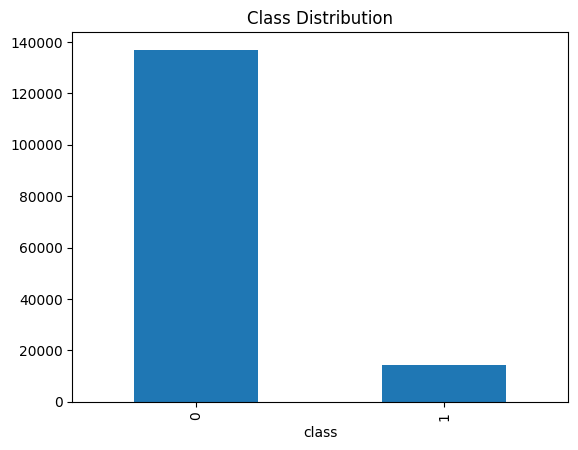

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Summary statistics for purchase_value
print(fraud_data['purchase_value'].describe())

# Histogram for purchase_value
fraud_data['purchase_value'].hist(bins=30)
plt.title('Distribution of Purchase Value')
plt.savefig('purchase_value_histogram.png')

# Bar plot for class
fraud_data['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.savefig('class_distribution.png')

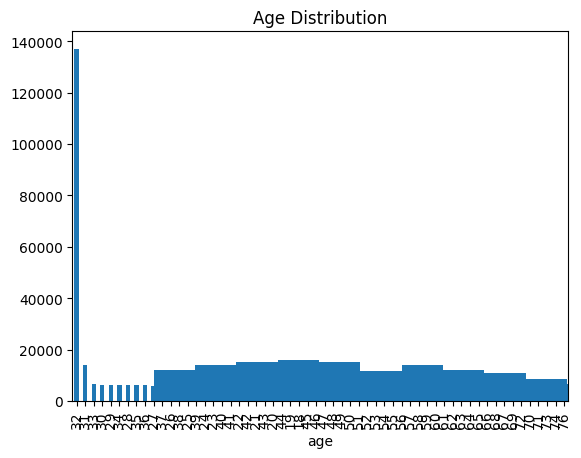

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Summary statistics for purchase_value

# Histogram for purchase_value
fraud_data['purchase_value'].hist(bins=30)
plt.title('Distribution of Purchase Value')
plt.savefig('purchase_value_histogram.png')

# Bar plot for class

fraud_data['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.savefig('class_distribution.png')

# Bar plot for class
fraud_data['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.savefig('age_distribution.png')

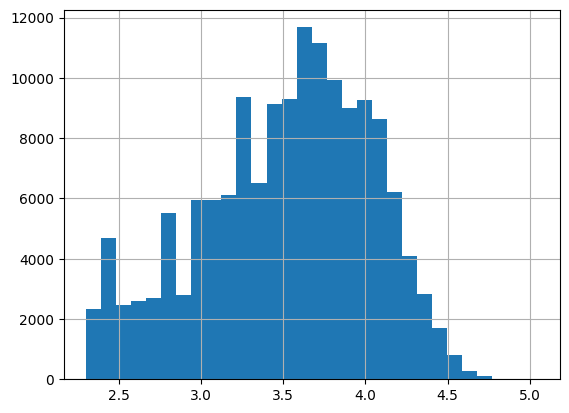

In [9]:
import numpy as np

fraud_data['log_purchase_value'] = np.log1p(fraud_data['purchase_value'])
fraud_data['log_purchase_value'].hist(bins=30)
plt.savefig('log_purchase_value_histogram.png')

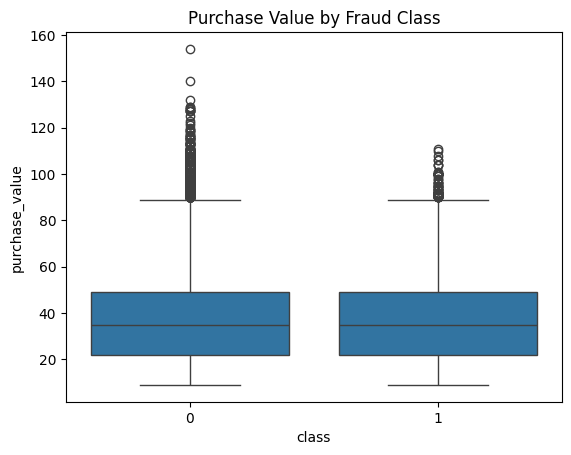

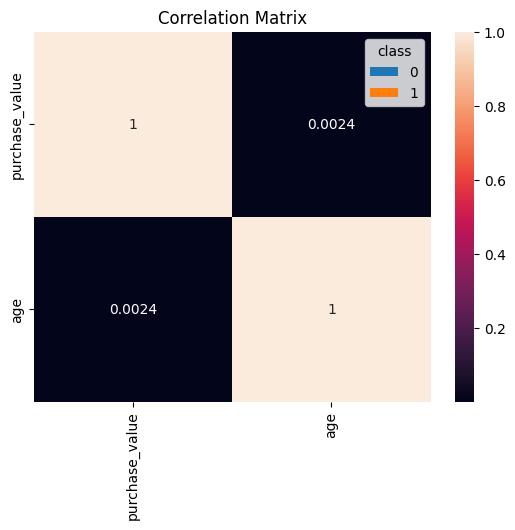

In [10]:
import seaborn as sns

# Box plot: purchase_value by class
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value by Fraud Class')
plt.savefig('purchase_value_by_class.png')

# Bar plot: source by class
fraud_data.groupby(['source', 'class']).size().unstack().plot(kind='bar')
plt.title('Source by Fraud Class')
plt.savefig('source_by_class.png')

# Correlation matrix for numerical features
numerical_cols = ['purchase_value', 'age']
correlation_matrix = fraud_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')

In [14]:
import pandas as pd



# Check the data type and sample values
print(fraud_data['purchase_time'].dtype)
print(fraud_data['purchase_time'].head(10))

object
0    2015-04-18 02:47:11
1    2015-06-08 01:38:54
2    2015-01-01 18:52:45
3    2015-05-04 13:54:50
4    2015-09-09 18:40:53
5    2015-07-09 08:05:14
6    2015-08-27 03:37:57
7    2015-05-25 17:21:14
8    2015-06-02 14:01:54
9    2015-03-23 23:05:42
Name: purchase_time, dtype: object


In [15]:
# Convert to datetime, specifying format if known
try:
    fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
    fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
except:
    fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'], errors='coerce')
    fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce')

# Verify conversion
print(fraud_data[['signup_time', 'purchase_time']].dtypes)
print(fraud_data[['signup_time', 'purchase_time']].head())

signup_time      datetime64[ns]
purchase_time    datetime64[ns]
dtype: object
          signup_time       purchase_time
0 2015-02-24 22:55:49 2015-04-18 02:47:11
1 2015-06-07 20:39:50 2015-06-08 01:38:54
2 2015-01-01 18:52:44 2015-01-01 18:52:45
3 2015-04-28 21:13:25 2015-05-04 13:54:50
4 2015-07-21 07:09:52 2015-09-09 18:40:53


Feature Engineering

In [16]:
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour.fillna(-1)  # Handle NaT
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek.fillna(-1)
fraud_data['time_since_signup'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds() / 3600
fraud_data['time_since_signup'] = fraud_data['time_since_signup'].fillna(0)  # Handle invalid timestamps

# Transaction frequency
fraud_data['transaction_count'] = fraud_data.groupby('user_id')['user_id'].transform('count')

# Transaction velocity
fraud_data = fraud_data.sort_values(['user_id', 'purchase_time'])
fraud_data['time_diff'] = fraud_data.groupby('user_id')['purchase_time'].diff().dt.total_seconds() / 3600
fraud_data['avg_velocity'] = fraud_data.groupby('user_id')['time_diff'].transform('mean').fillna(0)

In [17]:
#Geolocation (IP address conversion and merge)
def ip_to_int(ip):
    try:
        octets = str(ip).split('.')
        return sum(int(octet) * (256 ** (3 - i)) for i, octet in enumerate(octets))
    except:
        return 0

if fraud_data['ip_address'].dtype == 'object':
    fraud_data['ip_address'] = fraud_data['ip_address'].apply(ip_to_int)
fraud_data['ip_address'] = fraud_data['ip_address'].astype('int64')
ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].astype('int64')
ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].astype('int64')

def find_country(ip, ip_to_country):
    match = ip_to_country[(ip_to_country['lower_bound_ip_address'] <= ip) & 
                          (ip_to_country['upper_bound_ip_address'] >= ip)]
    return match['country'].iloc[0] if not match.empty else 'Unknown'

fraud_data['country'] = fraud_data['ip_address'].apply(lambda x: find_country(x, ip_to_country))

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


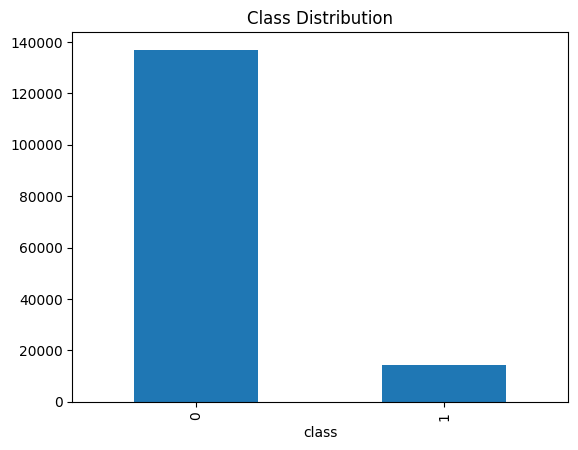

In [19]:
fraud_data['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.savefig('class_distribution.png')
print(fraud_data['class'].value_counts(normalize=True))

In [21]:
from imblearn.over_sampling import SMOTE
# Placeholder for Task 2
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


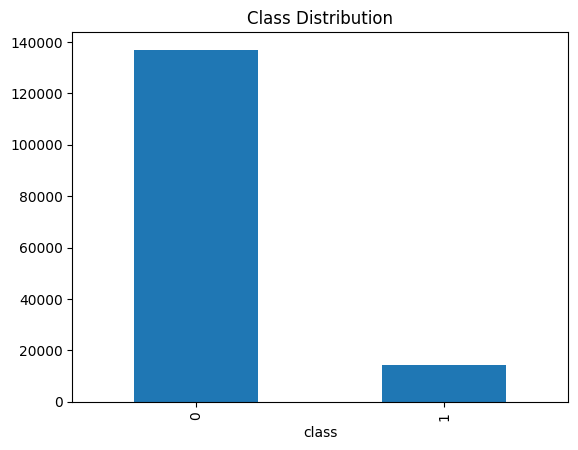

In [22]:
fraud_data['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.savefig('class_distribution2.png')
print(fraud_data['class'].value_counts(normalize=True))

In [23]:
class_counts = fraud_data['class'].value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance ratio (non-fraud to fraud): {imbalance_ratio:.2f}")

Imbalance ratio (non-fraud to fraud): 9.68


class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


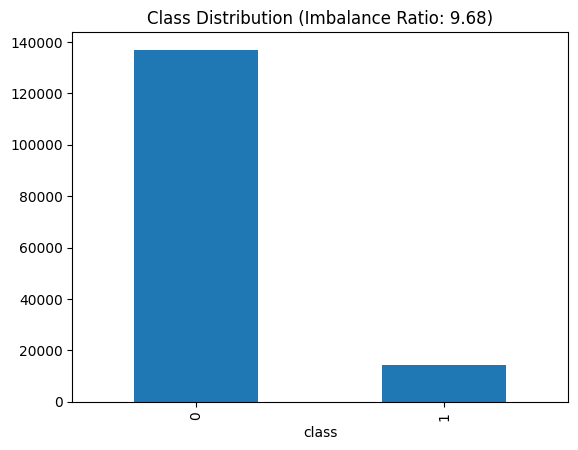

In [25]:
import matplotlib.pyplot as plt
fraud_data['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution (Imbalance Ratio: 9.68)')
plt.savefig('class_distribution3.png')
print(fraud_data['class'].value_counts(normalize=True))

In [26]:
from sklearn.preprocessing import StandardScaler
numerical_cols = [
    'purchase_value', 'age', 'ip_address', 'hour_of_day', 
    'day_of_week', 'time_since_signup', 'transaction_count', 'avg_velocity'
]
scaler = StandardScaler()
fraud_data[numerical_cols] = scaler.fit_transform(fraud_data[numerical_cols])